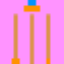

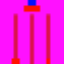

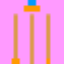

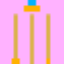

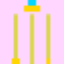

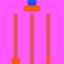

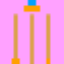

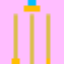

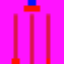

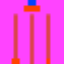

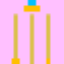

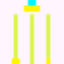

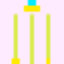

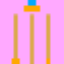

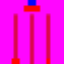

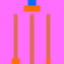

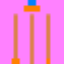

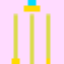

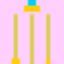

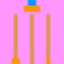

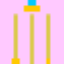

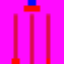

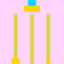

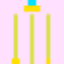

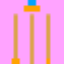

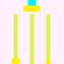

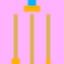

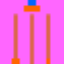

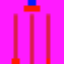

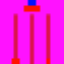

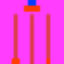

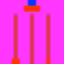

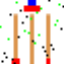

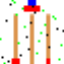

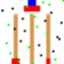

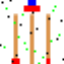

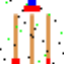

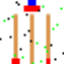

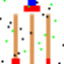

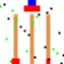

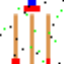

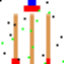

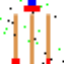

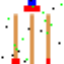

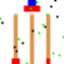

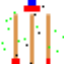

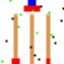

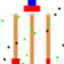

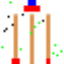

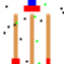

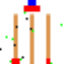

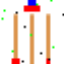

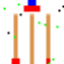

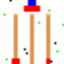

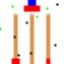

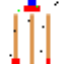

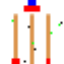

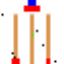

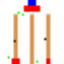

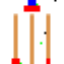

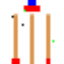

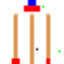

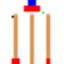

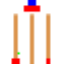

In [3]:
data = torch.load("dataset32x32_alterated.t7")

for i = 1, data.X:size()[1], 160 do
    itorch.image(image.scale(data.X[i],64,64))
end